In [152]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import os
import re
import pypdf

In [153]:
# DOES NOT WORK

# qurl = "https://hsquizbowl.org/db/packets/college/"
# # Get the links to packets for all tournaments
# r = requests.get(qurl)
# soup = BeautifulSoup(r.text, 'html.parser')
# # Get links to packets for all tournaments, that is qurl+hrefnum
# links = [qurl + link.get('href') for link in soup.find_all('a') if link.get('href')[:-1].isdigit()]

# print(links)

In [154]:
# scan pdf

# Get the text from the pdf
pdflink = "https://files.quizbowlpackets.com/2937/Emergency%201.%20UMN%20A,%20South%20Carolina%20A,%20JHU%20B.pdf"
r = requests.get(pdflink)
with open("packet.pdf", 'wb') as f:
    f.write(r.content)


In [155]:
pdf = pypdf.PdfReader(open("packet.pdf", "rb"))
text = ""
for page in pdf.pages:
    # if any word is "Bonuses", then stop
    if (("Bonuses" in page.extract_text()) or ("B O N U S E S" in page.extract_text())):
        print("found bonuses")
        break

    text += page.extract_text()
    # remove newlines
    text = text.replace("\n", " ")

categories = {}

# if any part of the text is of the form "<sometext>", then it is a category and we add it to the dictionary before we encounter the word "bonuses"

for match in re.findall(r'<(.*?)>', text):
    if match not in categories:
        categories[match] = 1
    else:
        categories[match] += 1

print(categories)

print(sum(categories.values()))

found bonuses
{'European Literature': 1, 'American History': 1, 'British Literature': 1, 'Physics': 1, 'Painting & Sculpture': 1, 'Social Science': 1, 'World History': 1, 'Other Academic': 1, 'Religion': 1, 'Other Science': 1, 'Other Fine Arts': 1, 'Chemistry': 1, 'Classical Music': 1, 'Other History': 1, 'World Literature': 1, 'Philosophy': 1, 'Biology': 1, 'American Literature': 1, 'Geography': 1, 'European History': 1}
20


In [156]:
os.remove("packet.pdf")

In [184]:
# We will do the same for packets from the links file and then plot the frequency of each category
# Read packets from the links
# For each packet, get the text
# For each packet, get the categories
# For each category, add to dictionary
# delete packet

with open('links.txt', 'r') as f:
    links = f.read()
links = links.split('\n')

categories = {}

for link in links:
    r = requests.get(link)
    with open("packet.pdf", 'wb') as f:
        f.write(r.content)

    pdf = pypdf.PdfReader(open("packet.pdf", "rb"))
    text = ""
    for page in pdf.pages:
        # if first word is "Bonuses", then stop

        if (("Bonuses" in page.extract_text()) or ("B O N U S E S" in page.extract_text())) or ("bonuses" in page.extract_text()) or ("BONUSES" in page.extract_text()):
            break
        text += page.extract_text()

    text = text.replace("\n", " ")

    # if any part of the text is of the form "<sometext>", then it is a category and we add it to the dictionary

    for match in re.findall(r'<(.*?)>', text):
        if match not in categories:
            categories[match] = 1
        else:
            categories[match] += 1

    # delete packet
    os.remove("packet.pdf")

print(categories)

{'Religion': 160, 'European History': 159, 'Chemistry': 161, 'World History': 158, 'Mythology': 121, 'Other Fine Arts': 139, 'European Literature': 161, 'Social Science': 149, 'Physics': 158, 'American Literature': 145, 'Biology': 162, 'Painting and Sculpture': 17, 'World Literature': 113, 'American History': 148, 'Philosophy': 145, 'Classical Music': 159, 'British Literature': 161, 'Other History': 149, 'Other Science': 134, 'Geography': 60, 'Other Academic': 36, 'Current Events': 59, 'Pop Culture': 32, 'Painting/Sculpture': 119, 'World/Other Literature': 44, 'Painting & Sculpture': 25, 'Ancient History': 11, 'Misc. Science': 23, 'Am erican History': 1, 'Mythology/Leg ends': 1, 'Other Fin e Arts': 1, 'Mythology/Legends': 12, 'European Hist ory': 1, 'Social Sc ience': 1, 'World Li terature': 1, 'Classic al Music': 1, 'Phy sics': 1, 'European Litera ture': 1, 'European Li terature': 1, 'Mythology/Legen ds': 1, 'World Histo ry': 1, 'Religion ': 1, 'British  Literature': 1, 'Soci al Scien

In [185]:
print(sum(categories.values()))

5044


In [189]:
# Clean the dictionary

# If key is of the form "author,category" then remove the author part entirely else just keep the key
# Remove spaces from the names of the categories and if any of the categories have the same name, then add the values

cleaned_categories = {}

for key in categories:
    repkey = key.replace(" ", "")
    if "," in repkey:
        repkey = repkey.split(",")[1]

    if repkey not in cleaned_categories:
        cleaned_categories[repkey] = categories[key]
    else:
        cleaned_categories[repkey] += categories[key]

print(sum(cleaned_categories.values()))

# there are categories that are the same but have different names, so we will add them together

removed = {}

for key in cleaned_categories:
    if ("Painting" in key) or ("Visual" in key and "Art" in key):
        if "Painting" not in removed:
            removed["Painting"] = cleaned_categories[key]
        else:
            removed["Painting"] += cleaned_categories[key]

    elif ("Music" in key) or ("Auditory" in key and "Art" in key):
        if "Music" not in removed:
            removed["Music"] = cleaned_categories[key]
        else:
            removed["Music"] += cleaned_categories[key]

    elif "Mythology" in key or "Religion" in key or "Belief" in key:
        if "Mythology" not in removed:
            removed["Mythology"] = cleaned_categories[key]
        else:
            removed["Mythology"] += cleaned_categories[key]

    elif "Other" in key and "Art" in key:
        if "OtherFineArts" not in removed:
            removed["OtherFineArts"] = cleaned_categories[key]
        else:
            removed["OtherFineArts"] += cleaned_categories[key]

    elif (("Other" in key or "Misc" in key or "Earth" in key) and "science" in key.lower()) or ("Astro" in key) or ("Stat" in key):
        if "OtherScience" not in removed:
            removed["OtherScience"] = cleaned_categories[key]
        else:
            removed["OtherScience"] += cleaned_categories[key]

    elif ("World" in key or "Other" in key) and "Lit" in key:
        if "WorldLit" not in removed:
            removed["WorldLit"] = cleaned_categories[key]
        else:
            removed["WorldLit"] += cleaned_categories[key]

    elif ("American" in key or "US" in key) and "Lit" in key:
        if "AmericanLit" not in removed:
            removed["AmericanLit"] = cleaned_categories[key]
        else:
            removed["AmericanLit"] += cleaned_categories[key]

    elif "British" in key and "Lit" in key:
        if "BritishLit" not in removed:
            removed["BritishLit"] = cleaned_categories[key]
        else:
            removed["BritishLit"] += cleaned_categories[key]

    elif "World" in key and "History" in key:
        if "WorldHistory" not in removed:
            removed["WorldHistory"] = cleaned_categories[key]
        else:
            removed["WorldHistory"] += cleaned_categories[key]

    elif ("American" in key or "US" in key) and "History" in key:
        if "AmericanHistory" not in removed:
            removed["AmericanHistory"] = cleaned_categories[key]
        else:
            removed["AmericanHistory"] += cleaned_categories[key]

    elif "European" in key and "History" in key:
        if "EuropeanHistory" not in removed:
            removed["EuropeanHistory"] = cleaned_categories[key]
        else:
            removed["EuropeanHistory"] += cleaned_categories[key]

    elif "Other" in key and "History" in key:
        if "OtherHistory" not in removed:
            removed["OtherHistory"] = cleaned_categories[key]
        else:
            removed["OtherHistory"] += cleaned_categories[key]

    else:
        if key not in removed:
            removed[key] = cleaned_categories[key]
        else:
            removed[key] += cleaned_categories[key]

for key in removed:
    print(key, removed[key])

print(sum(removed.values()))

5044
Mythology 451
EuropeanHistory 252
Chemistry 248
WorldHistory 253
OtherFineArts 240
EuropeanLiterature 241
SocialScience 256
Physics 247
AmericanLit 238
Biology 254
Painting 260
WorldLit 236
AmericanHistory 256
Philosophy 235
Music 261
BritishLit 239
OtherHistory 239
OtherScience 257
Geography 81
OtherAcademic 62
CurrentEvents 69
PopCulture 32
AncientHistory 11
CE/Geo/Other/PopCulture 18
ModernWorld 8
Poetry 15
Misc.Literature 14
LongFiction 14
ShortFiction 6
Drama 8
CE/Geo/Other 14
Other 29
5044


{'Mythology': 451, 'Music': 261, 'Painting': 260, 'OtherScience': 257, 'SocialScience': 256, 'AmericanHistory': 256, 'Biology': 254, 'WorldHistory': 253, 'EuropeanHistory': 252, 'Chemistry': 248, 'Physics': 247, 'EuropeanLiterature': 241, 'OtherFineArts': 240, 'BritishLit': 239, 'OtherHistory': 239, 'AmericanLit': 238, 'WorldLit': 236, 'Philosophy': 235, 'Geography': 81, 'CurrentEvents': 69, 'OtherAcademic': 62, 'PopCulture': 32, 'Other': 29, 'CE/Geo/Other/PopCulture': 18, 'Poetry': 15, 'Misc.Literature': 14, 'LongFiction': 14, 'CE/Geo/Other': 14, 'AncientHistory': 11, 'ModernWorld': 8, 'Drama': 8, 'ShortFiction': 6}


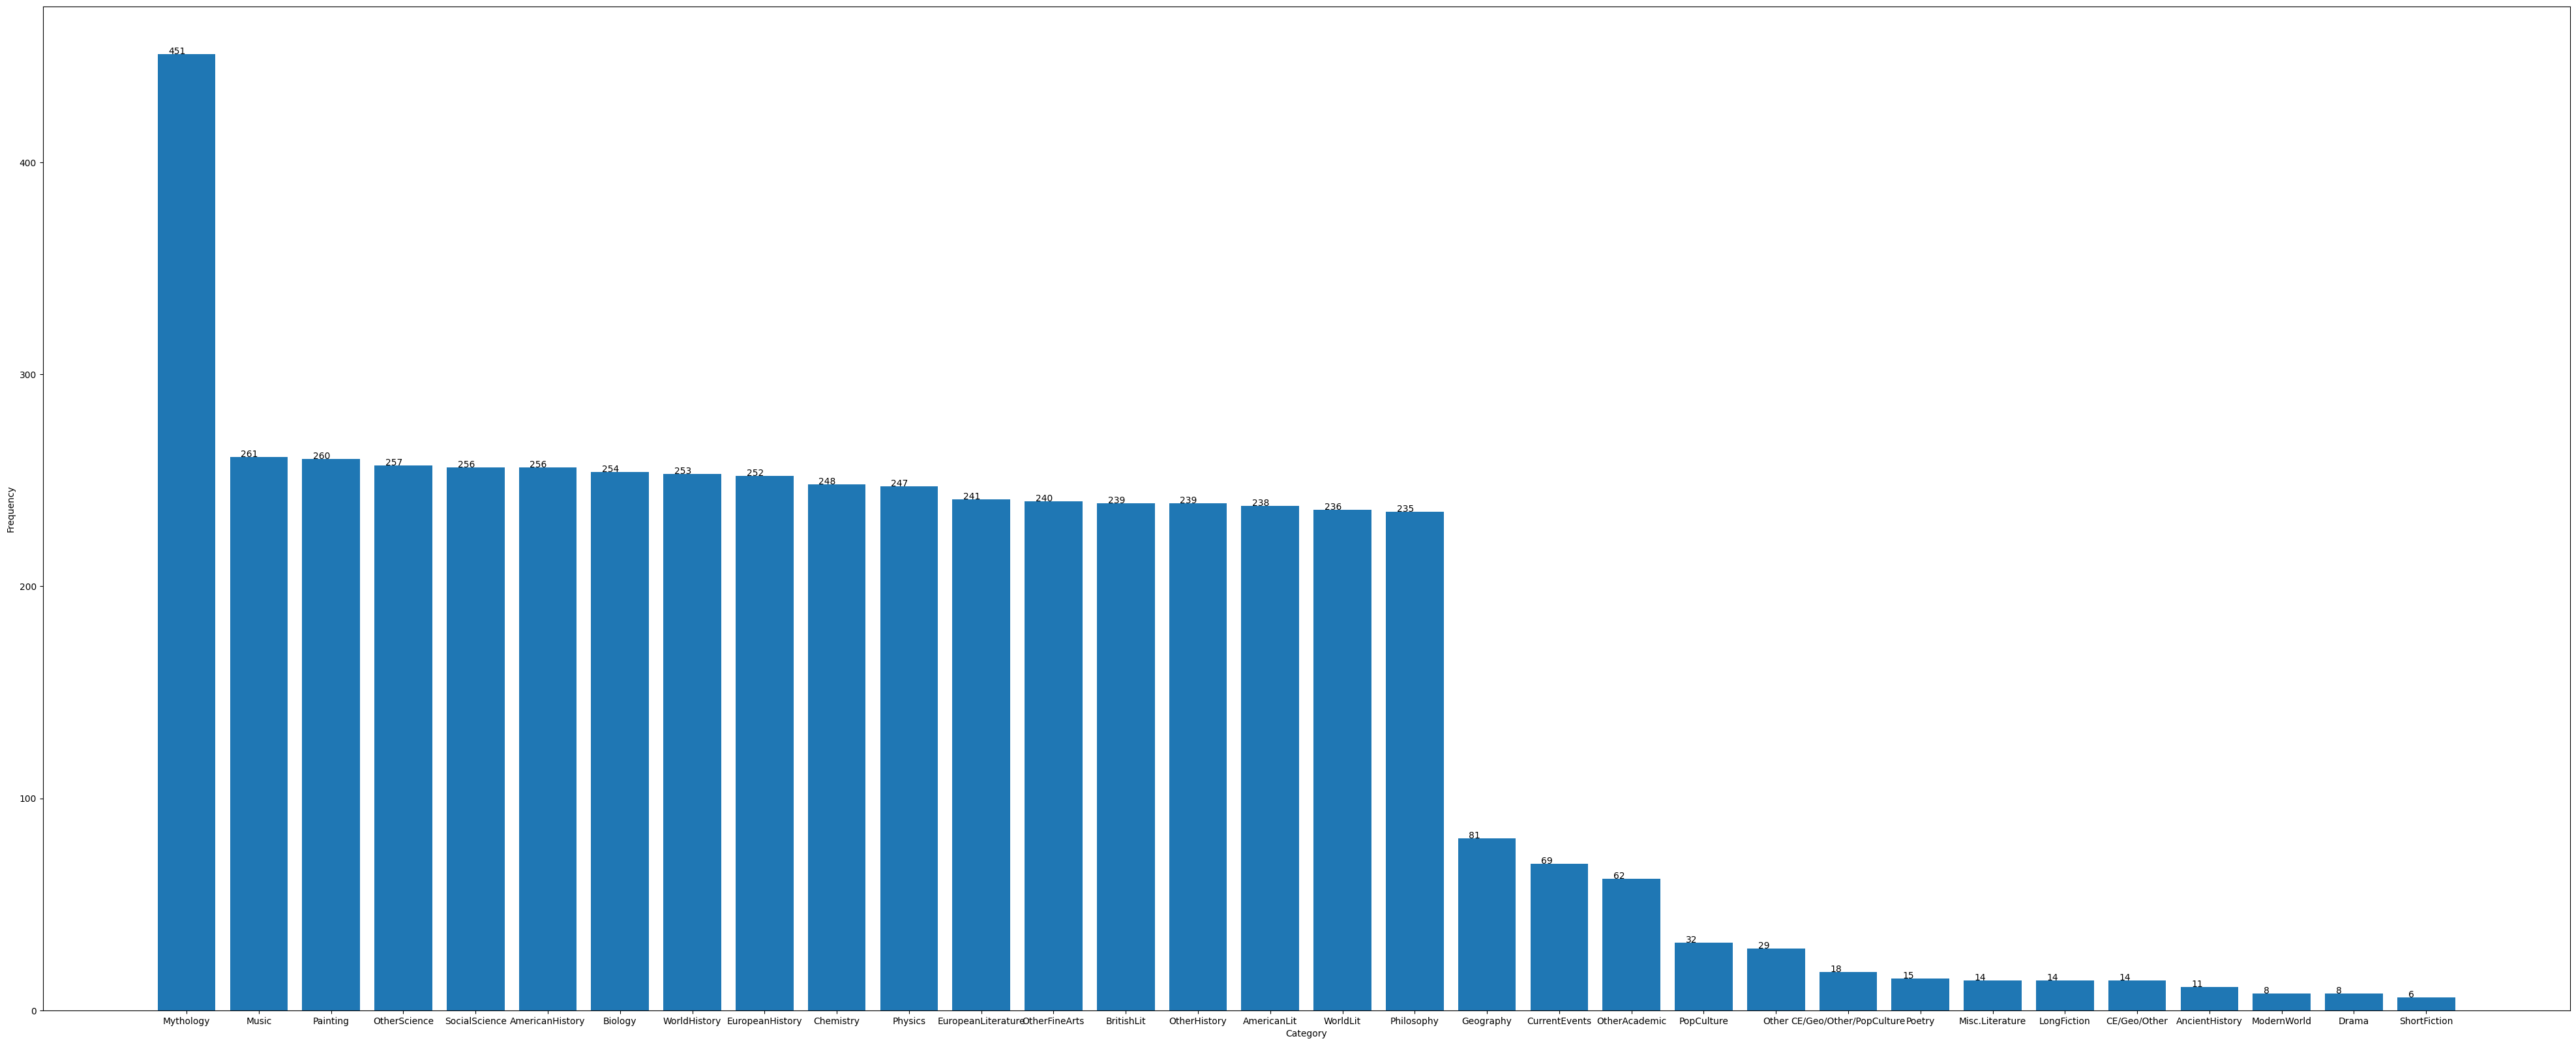

In [196]:
# Plot the frequency of each category
# Sort the dictionary by value
sorted_categories = sorted(removed.items(), key=lambda x: x[1], reverse=True)
sorted_categories = dict(sorted_categories)
print(sorted_categories)

# Plot all categories and show the absolute values at the top of each bar
plt.figure(figsize=(50, 20))
plt.bar(sorted_categories.keys(), sorted_categories.values())
plt.xlabel("Category")
plt.ylabel("Frequency")

for i, v in enumerate(sorted_categories.values()):
    plt.text(i - 0.25, v + 0.1, str(v))

plt.show()
